In [79]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [80]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    threshold = 0.70
    if effort <= threshold:
        quality = effort / threshold
    #elif effort > -0.5 and effort < 0.5:
    elif effort > threshold and effort <= 1:
        quality = (1/(1-threshold))*(1-effort)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
def contributioncalc(deadline, plots, uftype, printcontri):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**(i-period))))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*(i-period)))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(f"Period {period}: {contlist}, {sum(contlist)}")
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3, figsize=(15,10)).legend(bbox_to_anchor=(1.0, 1.0))
         ##colormap = 'hot') title = f"Effort decisions by period for deadline = {deadline}; delta = {delta}; beta = {beta}; W = {w}; Utilitytype = {uftype}",
        #plot



    return cltemp     

In [81]:
# Assign Variables

delta = 0.90        # Discount Factor
beta = 0.9          # Temporal Bias
w = 8        # Required accumulated Effort
r = 1.01           # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.9; beta = 0.9; w = 8;


Period 0: [0.7377586226809154, 0.8279434323409486, 0.8606341801961683, 0.8871136859588964, 0.908562085626706, 0.9259352893576319, 0.9400075843796818, 0.9514061433475423, 0.9606389761115093], 8.0
Period 1: [0.7377586226809154, 0.7986019283498067, 0.8678627251903082, 0.8929688074041496, 0.9133047339973612, 0.9297768345378625, 0.9431192359756686, 0.9539265811402916, 0.9626805307236362], 8.0
Period 2: [0.7377586226809154, 0.7986019283498067, 0.8457796367296556, 0.898816019658327, 0.9180409759232449, 0.9336131904978284, 0.946226684303241, 0.9564436142856252, 0.9647193275713564], 8.0
Period 3: [0.7377586226809154, 0.7986019283498067, 0.8457796367296556, 0.8823864196243169, 0.9228337299155143, 0.9374953212315665, 0.9493712101975689, 0.9589906802600308, 0.966782451010625], 8.0
Period 4: [0.7377586226809154, 0.7986019283498067, 0.8457796367296556, 0.8823864196243169, 0.9108343284668173, 0.9414984029070789, 0.9526137063547339, 0.9616171021473344, 0.9689098527393409], 8.0
Period 5: [0.73775862268

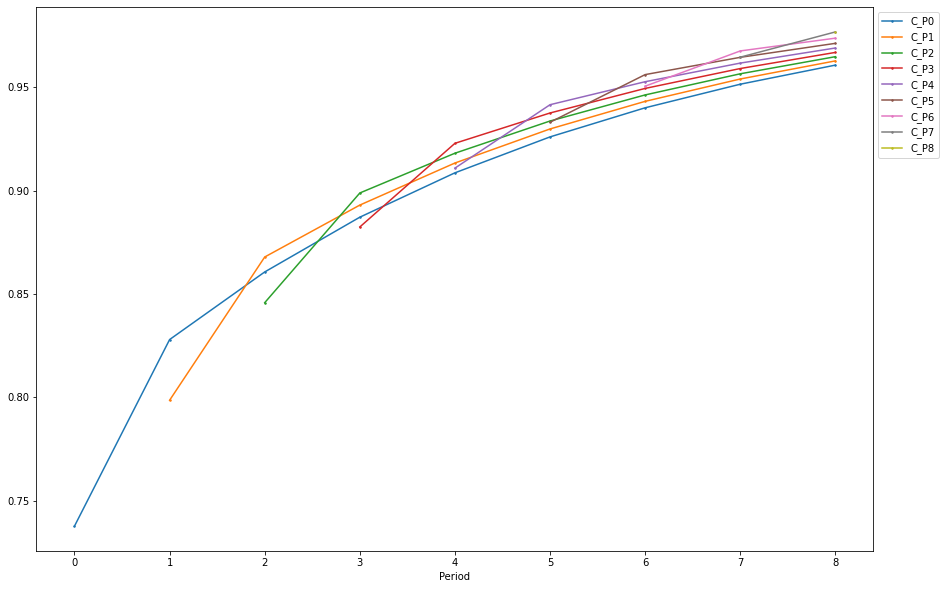

In [82]:
plottest1 = contributioncalc(8, True, "sqrt", True)

Period 0: [0.7377586226809154, 0.8279434323409486, 0.8606341801961683, 0.8871136859588964, 0.908562085626706, 0.9259352893576319, 0.9400075843796818, 0.9514061433475423, 0.9606389761115093], 8.0
Period 1: [0.7377586226809154, 0.7986019283498067, 0.8678627251903082, 0.8929688074041496, 0.9133047339973612, 0.9297768345378625, 0.9431192359756686, 0.9539265811402916, 0.9626805307236362], 8.0
Period 2: [0.7377586226809154, 0.7986019283498067, 0.8457796367296556, 0.898816019658327, 0.9180409759232449, 0.9336131904978284, 0.946226684303241, 0.9564436142856252, 0.9647193275713564], 8.0
Period 3: [0.7377586226809154, 0.7986019283498067, 0.8457796367296556, 0.8823864196243169, 0.9228337299155143, 0.9374953212315665, 0.9493712101975689, 0.9589906802600308, 0.966782451010625], 8.0
Period 4: [0.7377586226809154, 0.7986019283498067, 0.8457796367296556, 0.8823864196243169, 0.9108343284668173, 0.9414984029070789, 0.9526137063547339, 0.9616171021473344, 0.9689098527393409], 8.0
Period 5: [0.73775862268

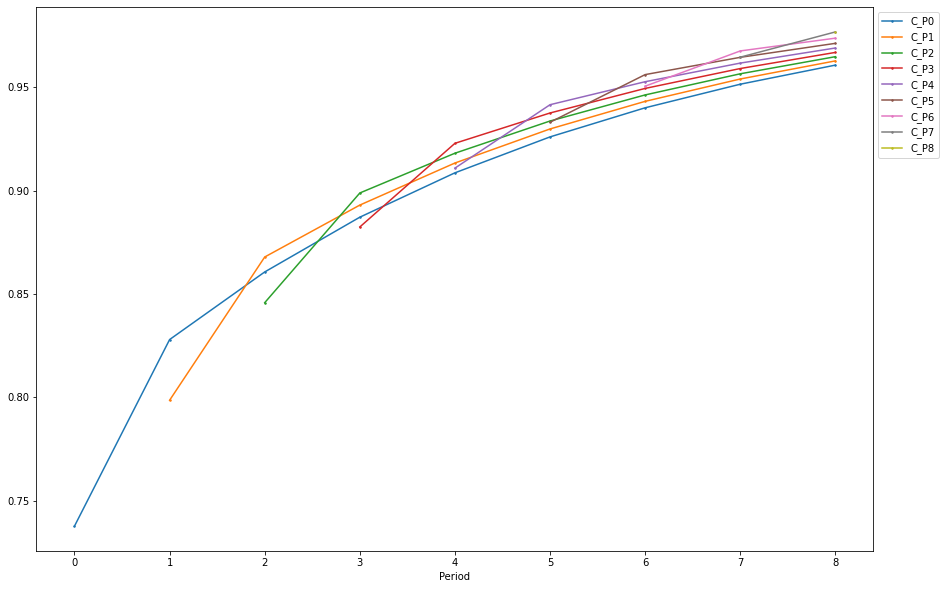

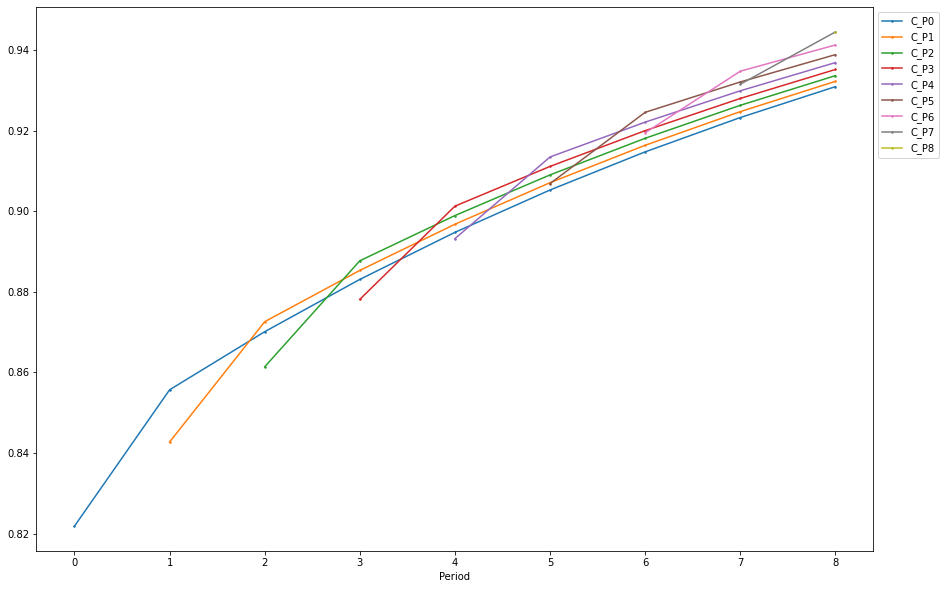

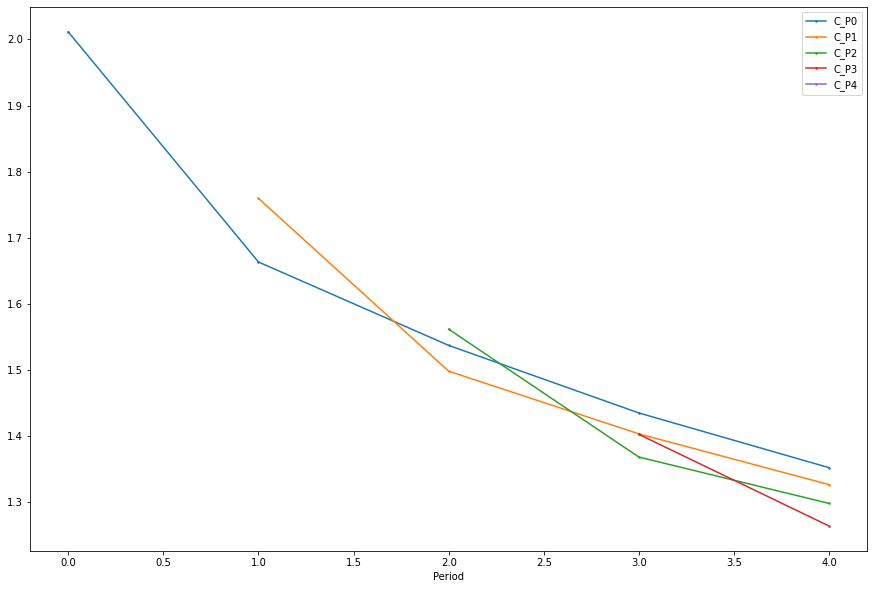

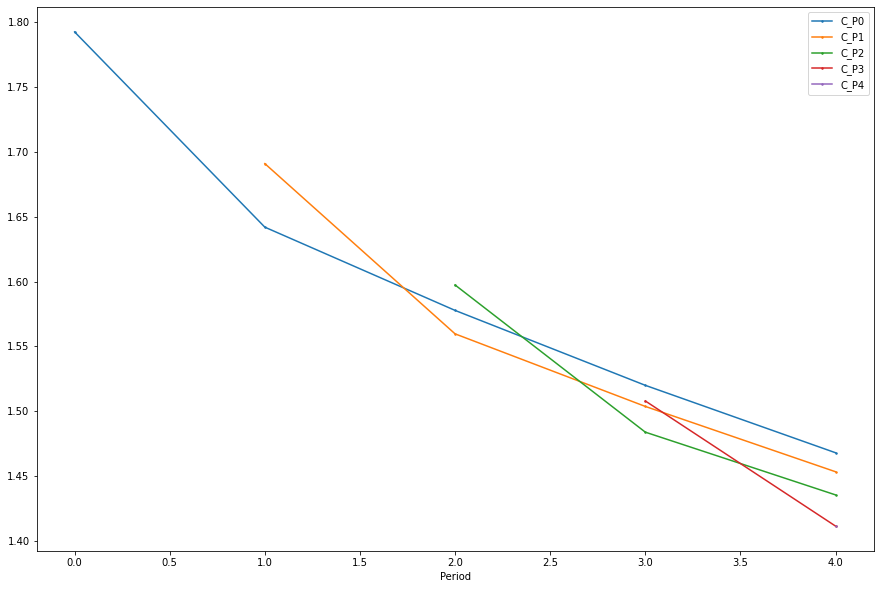

In [83]:
# Interesting Plots:
plottest1 = contributioncalc(8, True, "sqrt", True)
plottest2 = contributioncalc(8, True, "log", False)
plottest3 = contributioncalc(4, True, "sqrt", False)
plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt
0          8  3.333333    1.203973     1.825742    1.111849     1.686042
1          9  6.497791    1.871462     2.549077    1.711153     2.330722
2         10  8.071067    2.088286     2.840962    1.890498     2.571886
3         11  8.798008    2.174525     2.966144    1.949079     2.658625
4         12  9.154028    2.214194     3.025562    1.964985     2.685033
5         13  9.297993    2.229799     3.049261    1.959241     2.679272
6         14  9.326463    2.232856     3.053926    1.942502     2.656802
7         15  9.271457    2.226941     3.044907    1.918174     2.622729
8         16  9.156562    2.214471     3.025981    1.888548     2.580621
9         17  8.991834    2.196317     2.998639    1.854520     2.531983
10        18  8.749397    2.168985     2.957938    1.813309     2.472887
11        19  8.482151    2.137964     2.912413    1.769678     2.410721
12        20  8.179171    2.101591     2.859925    

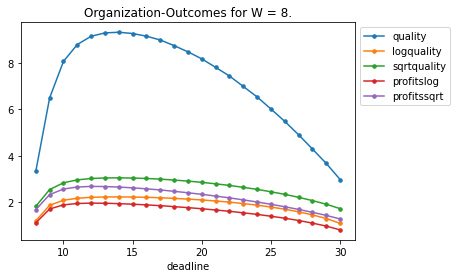

In [84]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 2*t + 15

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "log", False)]
    if sum(quallist) > 1:
        qualsum = sum(quallist)
    else:
        qualsum = 1
    qualitylist += [qualsum]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq

qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.").legend(bbox_to_anchor=(1.0, 1.0))

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt} Periods.")